<a href="https://colab.research.google.com/github/thinkinchicken/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1: Selecting a dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



First Choice: Data set

1) Source of Data: Kaggle

2) 1700 individual chocolate bar ratings, regional origin, percentage of coca, and variety of chocolate bean, and region of where they were grown. 

3) Target is the rating of the chocolate bar

4) This is a regression problem. 

5) 8 features

6) 1795 rows

7) Challenges is some columns have null values for certain features. May need some extra cleaning 


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/07 Week 7: Classification Models/flavors_of_cacao.csv', header = 0)
df.shape

(1795, 9)

In [4]:
df.head()
df['Bean\nType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Nacional (Arriba)             3
Matina                        3
Beniano                       3
Trinitario, Forastero         2
Forastero (Catongo)           2
Amazon mix                    2
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Nacional                      2
Criollo (Ocumare 61)          2
Criollo (Amarru)              2
Amazon, ICS                   2
Trinitario (Amelonado)        1
Trinitario, TCGA              1
Criollo (Ocumare)             1
Forastero (Arriba) ASSS       1
Blend-Forastero,Criollo       1
Criollo (Wild)                1
Trinitar

Second Choice: Data set 2

1) Source of Data: Kaggle

2) Data includes country, locality, market, goods purchased, price, currency used, quantity, and month/year of purchase of food prices worldwide

3) Target is the price of the food

4) This is a regression problem

5) 10 features

6) 743914 rows of data

7) Challenges I foresee is that the dataset may need extra cleaning and there are also a lot of features that are necessarily numerical. 
It is a very large dataset that may also take a lot of time to train and test on. 

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/07 Week 7: Classification Models/wfp_market_food_prices.csv',encoding='latin-1')
df2.head()


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [6]:
df2.shape

(743914, 18)

Flavors of cacao dataset has been approved!


##Part 2: Cleaning the dataset

In [7]:
df.head()


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
#Renaming all the columns to be more readable and getting rid of some of the weird characters in each of them
df = df.rename(columns = {'Specific Bean Origin\nor Bar Name':'Specific_Bean_Origin_Bar_Name', 'Review\nDate':'Review_Date', 'Cocoa\nPercent':'Cocoa_percent','Company\nLocation':'Company_location', 'Bean\nType':'Bean_type', 'Broad Bean\nOrigin': 'Broad_Bean_Origin'})

In [9]:
#Renaming the first column because the first time didn't work
df = df.rename(columns={ df.columns[0]: 'Company(Maker)' })

In [10]:
#Checking if the renaming worked
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Review_Date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [11]:
#checking for null values, We see that there are 2 in both bean type and broad bean origin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1795 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1795 non-null   object 
 2   REF                            1795 non-null   int64  
 3   Review_Date                    1795 non-null   int64  
 4   Cocoa_percent                  1795 non-null   object 
 5   Company_location               1795 non-null   object 
 6   Rating                         1795 non-null   float64
 7   Bean_type                      1794 non-null   object 
 8   Broad_Bean_Origin              1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [12]:
#Checking the specific on these null values
df[df.isnull().any(axis=1)]

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Review_Date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [13]:
#Deciding to drop the null values as they are not a simple fix of imputing or backfilling and it is only 2 data points
df = df.dropna()

In [14]:
#checking to see if removing null values worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Review_Date                    1793 non-null   int64  
 4   Cocoa_percent                  1793 non-null   object 
 5   Company_location               1793 non-null   object 
 6   Rating                         1793 non-null   float64
 7   Bean_type                      1793 non-null   object 
 8   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


In [15]:
#Checking for duplicated values. Looks like there isn't any
df.duplicated().any()

False

In [16]:
df['REF'].nunique()
#Looking at the data dictionary, this value is an index for the date the review was actually done

440

In [17]:
#The date the Review was published does not seem relevant to the rating of the actual chocolate bar so going to remove that column
df = df.drop(columns = 'Review_Date')


In [18]:
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,70%,France,3.50,,Peru


In [19]:
#Need to convert cocoa_percent to a float but also need to remove the percentage sign
df['Cocoa_percent'] = df['Cocoa_percent'].str.strip('%').astype(float)/100

In [20]:
#Checking to see if conversion of data type worked
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Cocoa_percent                  1793 non-null   float64
 4   Company_location               1793 non-null   object 
 5   Rating                         1793 non-null   float64
 6   Bean_type                      1793 non-null   object 
 7   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 126.1+ KB


In [21]:
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,0.70,France,3.50,,Peru


In [22]:
#Checking the stats and if there are any outliers or weird numbers
df.describe()

,REF,Cocoa_percent,Rating
count,1793.000000,1793.000000,1793.000000
mean,1036.126046,0.716991,3.185862
std,553.128742,0.063265,0.477668
min,5.000000,0.420000,1.000000
25%,576.000000,0.700000,3.000000
50%,1073.000000,0.700000,3.250000
75%,1502.000000,0.750000,3.500000
max,1952.000000,1.000000,5.000000


In [23]:
#Starting to check ig there are any inconsistencies or misspellings
df['Company(Maker)'].value_counts()

Soma                            46
Bonnat                          27
Fresco                          26
Pralus                          25
A. Morin                        23
                                ..
Anahata                          1
Pura Delizia                     1
Christopher Morel (Felchlin)     1
Kiskadee                         1
Malmo                            1
Name: Company(Maker), Length: 416, dtype: int64

In [24]:
df['Specific_Bean_Origin_Bar_Name'].value_counts()

Madagascar                               56
Peru                                     45
Ecuador                                  42
Dominican Republic                       37
Venezuela                                21
                                         ..
Mora Mora 2006                            1
Porcelana, S. of Lake Maracaibo           1
Porcelana, Tabasco                        1
O'ahu, N. Shore, Waialua E., Kakoleka     1
Castillo, Hispaniola, unroasted           1
Name: Specific_Bean_Origin_Bar_Name, Length: 1038, dtype: int64

In [25]:
df['Company_location'].value_counts()

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Peru                  17
Brazil                17
Madagascar            17
Japan                 17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Costa Rica             9
Israel                 9
Argentina              9
Poland                 8
Honduras               6
Lithuania              6
Sweden                 5
South Korea            5
Nicaragua              5
Domincan Republic      5
Mexico                 4
Fiji                   4
Amsterdam              4
Sao Tome               4
Puerto Rico            4
Netherlands            4


In [26]:
df['Bean_type'].value_counts()
#We see that there are a lot of blank values for bean type. Might be worth filling in this with "Unknown"

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Nacional (Arriba)             3
Matina                        3
Beniano                       3
Trinitario, Forastero         2
Forastero (Catongo)           2
Amazon mix                    2
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Nacional                      2
Criollo (Ocumare 61)          2
Criollo (Amarru)              2
Amazon, ICS                   2
Trinitario (Amelonado)        1
Trinitario, TCGA              1
Criollo (Ocumare)             1
Forastero (Arriba) ASSS       1
Blend-Forastero,Criollo       1
Criollo (Wild)                1
Trinitar

In [27]:
#Getting the column value of blank to be replaced because just using '' isn't working
df['Bean_type'].max()


'\xa0'

In [28]:
#Replacing with Unknown
df['Bean_type']= df['Bean_type'].replace('\xa0','Unknown')

In [29]:
#Checking to see if it worked. It did! 
df['Bean_type'].value_counts()

Unknown                     887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Beniano                       3
Nacional (Arriba)             3
Matina                        3
EET                           3
Amazon, ICS                   2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Amarru)              2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Nacional                      2
Criollo (Ocumare 61)          2
Forastero (Catongo)           2
Blend-Forastero,Criollo       1
Criollo, +                    1
Forastero (Arriba) ASSS       1
Criollo (Ocumare 67)          1
Criollo (Ocumare 77)          1
Criollo (Ocumare)             1
Foraster

In [30]:
#Checking dataset again to see what we can plot
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company(Maker)                 1793 non-null   object 
 1   Specific_Bean_Origin_Bar_Name  1793 non-null   object 
 2   REF                            1793 non-null   int64  
 3   Cocoa_percent                  1793 non-null   float64
 4   Company_location               1793 non-null   object 
 5   Rating                         1793 non-null   float64
 6   Bean_type                      1793 non-null   object 
 7   Broad_Bean_Origin              1793 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 126.1+ KB


In [31]:
df['Rating'].value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

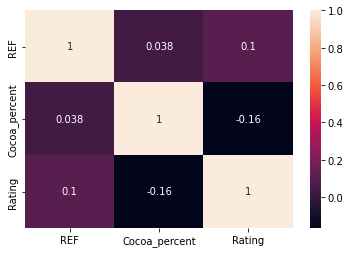

In [32]:
#Correlation heatmap. Doesn't seem to be any correlation between the numerical data points
sns.heatmap(df.corr(), annot=True)


In [33]:
#Sorting the top rated bars to plot
df = df.sort_values(by = ['Rating'],ascending = False)

In [34]:
#Getting the top 10 rated bars
top_10 = df[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Chocolate Bar Rating by Company(Maker)')

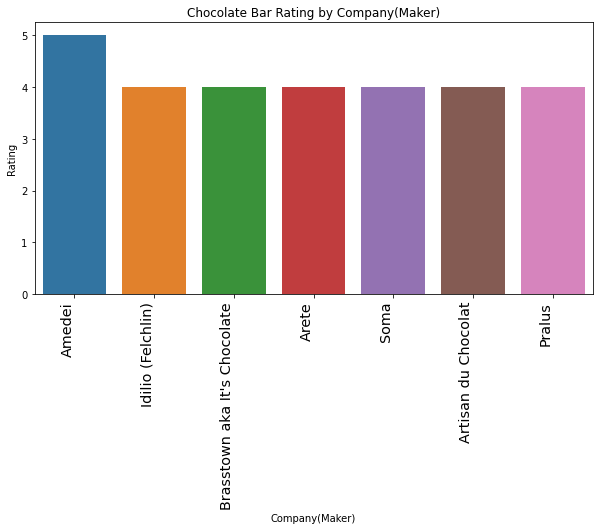

In [35]:
#Plotting the top 10 bars by Company

plt.figure(figsize=(10,5))
plot = sns.barplot(top_10['Company(Maker)'], top_10['Rating'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Chocolate Bar Rating by Company(Maker)')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Chocolate Bar Ratings')

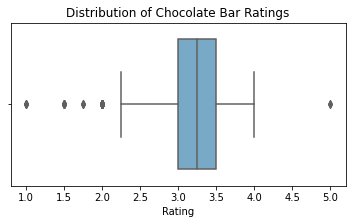

In [82]:
#Checking the outliers within Rating. Looks like there are a couple. 5 data points
plt.figure(figsize=(6, 3))
sns.boxplot(df['Rating'],palette="Blues")
plt.title('Distribution of Chocolate Bar Ratings')

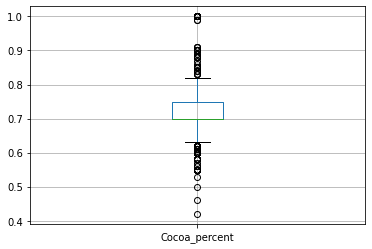

In [37]:
df.boxplot(['Cocoa_percent'])
# A lot more outliers here for coca percentage in the bars

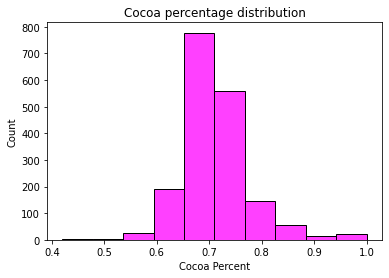

In [38]:
#Plotting a histogram to see the distribution of the Cocoa percentage also. Looks relatively normal
sns.histplot(df['Cocoa_percent'], bins = 10, color = 'magenta') 
plt.ylabel('Count')
plt.xlabel('Cocoa Percent')
plt.title('Cocoa percentage distribution');

In [102]:
df['Specific_Bean_Origin_Bar_Name'].nunique()

1038

In [103]:
df['Broad_Bean_Origin'].nunique()

99

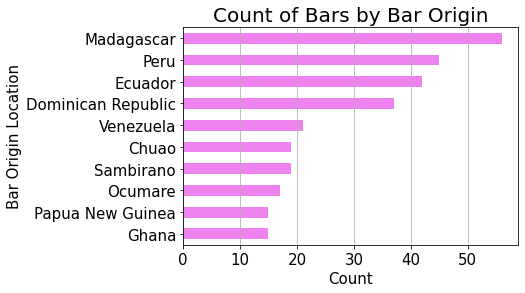

In [100]:
df['Specific_Bean_Origin_Bar_Name'].value_counts().nlargest(10).sort_values(ascending = True).plot(kind = 'barh', fontsize= 15, color = 'violet')
plt.title('Count of Bars by Bar Origin', fontsize = 20)
plt.grid(axis = 'x')
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Bar Origin Location", fontsize =15)
plt.show()

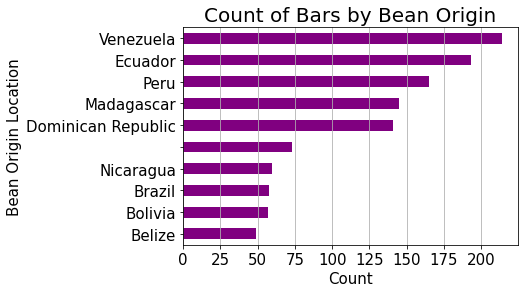

In [101]:
df['Broad_Bean_Origin'].value_counts().nlargest(10).sort_values(ascending = True).plot(kind = 'barh', fontsize= 15, color = 'purple')
plt.title('Count of Bars by Bean Origin', fontsize = 20)
plt.grid(axis = 'x')
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Bean Origin Location", fontsize =15)
plt.show()

In [39]:
top = df.loc[df['Rating']==5]

In [40]:
top

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
86,Amedei,Toscano Black,40,0.7,Italy,5.0,Blend,
78,Amedei,Chuao,111,0.7,Italy,5.0,Trinitario,Venezuela


In [41]:
bottom = df.loc[df['Rating']==1]
bottom

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
437,Claudio Corallo,Principe,252,1.00,Sao Tome,1.0,Forastero,Sao Tome & Principe
465,Cote d' Or (Kraft),Sensations Intense,48,0.70,Belgium,1.0,Unknown,
326,Callebaut,Baking,141,0.70,Belgium,1.0,Unknown,Ecuador
1175,Neuhaus (Callebaut),Dark,135,0.73,Belgium,1.0,Unknown,


##Part 4
Model Development

In [42]:
#Refamiliarizing myself with the dataset
df.head()

,Company(Maker),Specific_Bean_Origin_Bar_Name,REF,Cocoa_percent,Company_location,Rating,Bean_type,Broad_Bean_Origin
86,Amedei,Toscano Black,40,0.7,Italy,5.0,Blend,
78,Amedei,Chuao,111,0.7,Italy,5.0,Trinitario,Venezuela
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,0.7,Switzerland,4.0,Trinitario,Venezuela
256,Brasstown aka It's Chocolate,Chuao,1355,0.7,U.S.A.,4.0,Trinitario,Venezuela
117,Arete,Chuno,1598,0.7,U.S.A.,4.0,"Criollo, Trinitario",Nicaragua


In [43]:
#Assigning X and y variable. Knowing we want to predict the rating of the chocolate bar, we assign that as the target
X = df.drop(columns = 'Rating')
y = df['Rating']

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [46]:
ohe = OneHotEncoder()
scaler = StandardScaler()

# use make_column_selector to identify your categorical features and your numerical features

cat_feat= make_column_selector(dtype_include = 'object')
# This will identify all of the quantitative features (columns)
quant_feat = make_column_selector(dtype_include = 'number')

# Instantiate the column transformers you want to use
encoder = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()

# Now make the column transformer...this matches the transformations that we want with the appropriate columns.
column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))


In [47]:
# make a pipeline including your column transformer and Adaboost with defaults
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(column_transformer, rf)

In [48]:
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
 

In [49]:
#Evaluate the performance of the model
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.8846133925927647
0.17686302546295052


Seeing that the random forest has a low test score. Let's try some different hypertuning on this one to see if we can make the test score better. 

In [50]:
#Importing Gridsearch in order to try a different combination of hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [51]:
# Using the documentation as your guide, define a dictionary of the pararameters you want to tune and the values you want to try out
params = {'max_depth':[10,30,50], 'n_estimators':[100,200,300]}

In [52]:
# Instantiate a gridsearch with the model you want to use and your hyperparamter dictionary
grid = GridSearchCV(RandomForestRegressor(), param_grid = params)

In [53]:
# Now create a pipeline with the scaler and the gridsearch model
grid_pipe = make_pipeline(column_transformer, grid)

grid_pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...
                                                              min_samples_leaf=1,
                                                             

In [54]:
# Check the optimal combinations of hyperparameters
grid.best_params_

{'max_depth': 50, 'n_estimators': 200}

We see that the max depth of 50 with n estimators of 300 is optimal for the random forest. 

In [55]:
#Checking the score of these optimal combinations of hyperparameters
print(grid_pipe.score(X_train, y_train))
print(grid_pipe.score(X_test, y_test))

0.8378802791612476
0.17005527850174773


Doesn't look like the grid search helped out much. Will just stick to the original default parameters where the score was actually better. 

In [56]:
#Importing KNNeighbors to see if it can do any better than any of the tree models
from sklearn.neighbors import KNeighborsRegressor

In [57]:
#Instantiating the model and creating a pipeline with the column transformer and model
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(column_transformer, knn)

In [58]:
#fitting the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...),
                                                 ('standardscaler',
                                                  StandardScaler(copy=Tru

In [59]:
#Evaluate the performance of the model
knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)
print(knn_train_score)
print(knn_test_score)

0.42816580146449723
0.17442328893338932


Looks like the test score improved a bit but the training score suffered. Let's see what we can hypertune with a gridsearch on the knn model

In [60]:
#Checking the hyperparameters used in this case, looks like the default number of neighbors used was 5
knn_pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...),
                                                 ('standardscaler',
                                                  StandardScaler(copy=Tru

In [61]:
#Specifying the different hyperparameters we would like to try
params2 = {'n_neighbors':[2,5,10,50,100], 'weights':['uniform', 'distance'],  'p':[1,2]}

In [62]:
# Instantiate a gridsearch with the model you want to use and your hyperparamter dictionary
grid2 = GridSearchCV(KNeighborsRegressor(), param_grid = params2)

In [63]:
# Now create a pipeline with the scaler and the gridsearch model
pipe2 = make_pipeline(column_transformer, grid2)

pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...
                              estimator=KNeighborsRegressor(algorithm='auto',
                                                            leaf_

In [64]:
# Check the optimal combinations of hyperparameters
grid2.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [65]:
#Printing the score of the optimal hyperparameters for the KNN model
print(pipe2.score(X_train, y_train))
print(pipe2.score(X_test, y_test))

1.0
0.20167673284934062


Looks like it is certainly overfit on the training data, but it is also the best test score that we have seen using the hypertuned KNN model

In [66]:
#Trying a booster to see if it'll improve the score 
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
gb = GradientBoostingRegressor(random_state = 42)
gb_pipe = make_pipeline(column_transformer, gb)

In [68]:
gb_pipe.fit(X_train, y_train)
# To evaluate your classification model, print a classification report
print('Training accuracy:', gb_pipe.score(X_train, y_train))
print('Testing accuracy:', gb_pipe.score(X_test, y_test))


Training accuracy: 0.3816404234505354
Testing accuracy: 0.12075468711095805


Looks like the gradient booster didn't really help with either the training score or the test score

In [69]:
#Last but not least, let's just try a linear regression model 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

lg_pipe = make_pipeline(column_transformer, linreg)

In [70]:
#fitting the model on the training data
lg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f425cc75dd0>),
                                                 ('standardscaler',
                                                  StandardScaler(

In [71]:
lg_train_score = lg_pipe.score(X_train, y_train)
lg_test_score = lg_pipe.score(X_test, y_test)
print(lg_train_score)
print(lg_test_score)

0.8798472426244789
-0.6675577188206752


The training score did really well, however the test score is far beyond a good score. 


In [72]:
#Checking the hyperparameters available for a linear regression model
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#Importing some metric tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
#Calculating some of the metrics for our best model: the hypertuned KNN 
y_pred = pipe2.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)


In [75]:
print(f' MAE: {mae},\n MSE: {mse},\n RMSE: {rmse},\n R^2 Score: {r2}')

 MAE: 0.08683913096578823,
 MSE: 0.04654812380055364,
 RMSE: 0.21575014206380871,
 R^2 Score: 0.7958765613648869


The R2 value tells us that 79% of the variability within the rating score is accounted for by our KNN model.

The MAE tells us that on average our error is about 0.08 off on ratings for chocolate bars

Conclusion is to use K nearest Neighbors model with n = 5, p = 1, and weights = 'distance' because this had the best training and test scores out of the other hypertuned regression models. 